# **Import Library dan Dataset**

**Import Library**

In [3]:
!pip install geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Dataset**

In [32]:
dataset = pd.read_csv('LastSyncDataClass.csv')
sby = gpd.read_file("./SHP/SHP_Surabaya.shp")
dataset.head()

,Lat,Long,Tdom,Vs30,Tclass,Vclass,ClasCom
0,-7.20,112.64,1.294,142.88,E,E,1
1,-7.20,112.66,0.930,146.15,E,E,1
2,-7.21,112.62,0.993,47.00,E,E,1
3,-7.21,112.76,0.567,123.58,D,E,2
4,-7.21,112.76,0.494,107.22,D,E,2


**Get DataValue dan Splitting Data**

In [8]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-3].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

**Scaling Data**

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Membuat dan Evaluasi Model**

**Penentuan Model yang Digunakan**

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Gnb_pred = gnb.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, metric="manhattan", p=2)
classifier.fit(X_train, y_train)
Knn_pred = classifier.predict(X_test)

**Cek Akurasi Model**

In [19]:
from sklearn import metrics
Gacc = metrics.accuracy_score(y_test, Gnb_pred)
Kacc = metrics.accuracy_score(y_test, Knn_pred)
print("Naive Bayes Accuracy: %.2f persen"%(Gacc*100))
print("K-Nearest Neighbors Accuracy: %.2f persen"%(Kacc*100))

Naive Bayes Accuracy: 77.78 persen
K-Nearest Neighbors Accuracy: 83.33 persen


**Cek Error Model**

In [20]:
from sklearn.metrics import mean_squared_error
Gerror = mean_squared_error(y_test, Gnb_pred)
Kerror = mean_squared_error(y_test, Knn_pred)
print ("Naive Bayes Error: %.2f persen"%(Gerror*100))
print ("Tingkat Error %.2f persen"%(Kerror*100))

Naive Bayes Error: 22.22 persen
Tingkat Error 16.67 persen


**Rescalling data**

In [36]:
X_train = sc.inverse_transform(X_train)
X_test = sc.inverse_transform(X_test)

# **Plotting**

**Plotting Data Pengukuran Kerentanan Tanah**

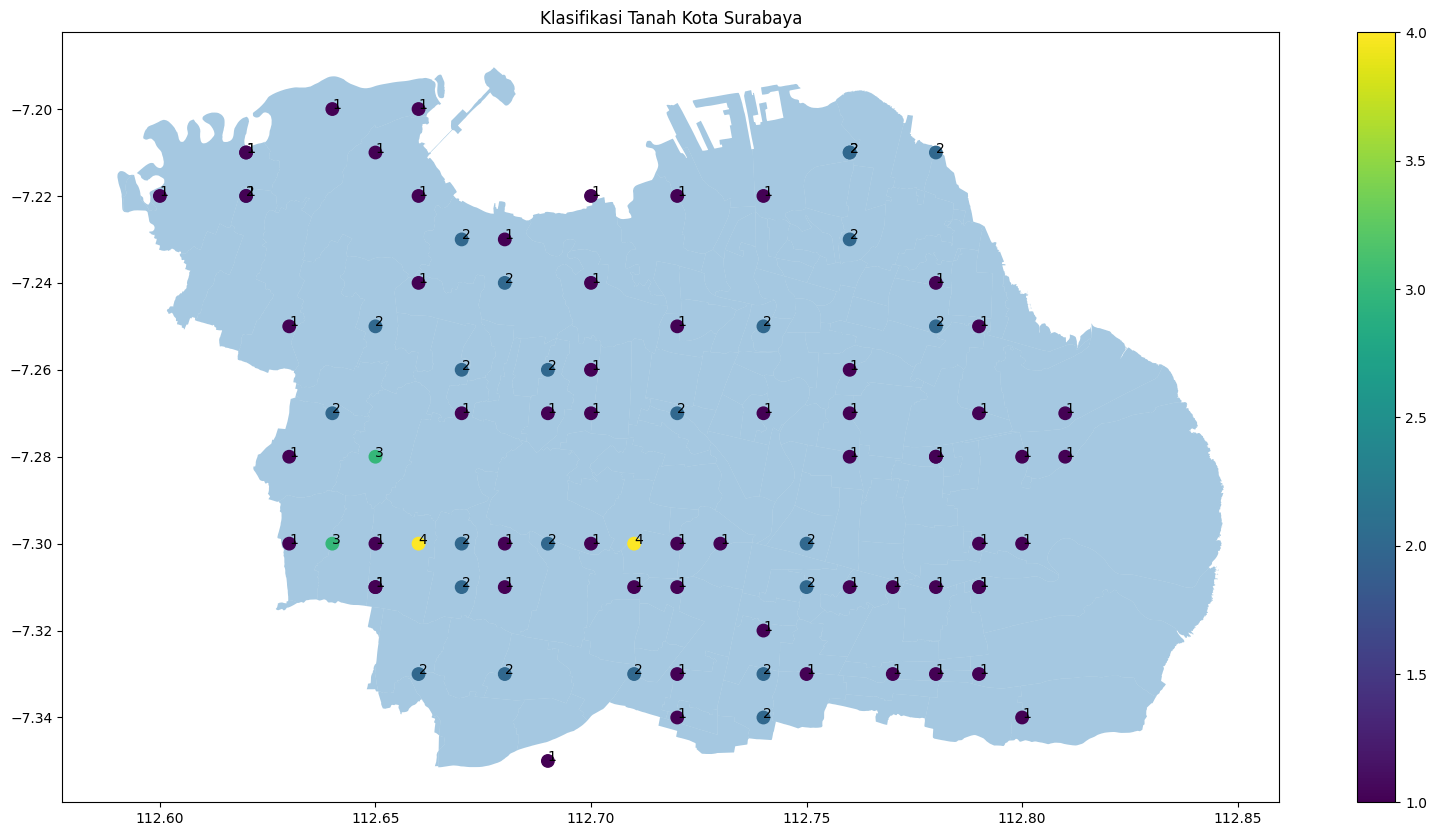

In [33]:
sby.plot(alpha=0.4, figsize = (20,10), legend=True)
plt.title('Klasifikasi Tanah Kota Surabaya')

plt.scatter(X[:,1], X[:, 0], c=y, s=80)
for i, txt in enumerate(y):
    plt.annotate(txt, (X[:,1][i], X[:,0][i]))
plt.colorbar()
plt.show()

**Plotting Data Model Naive Bayes**

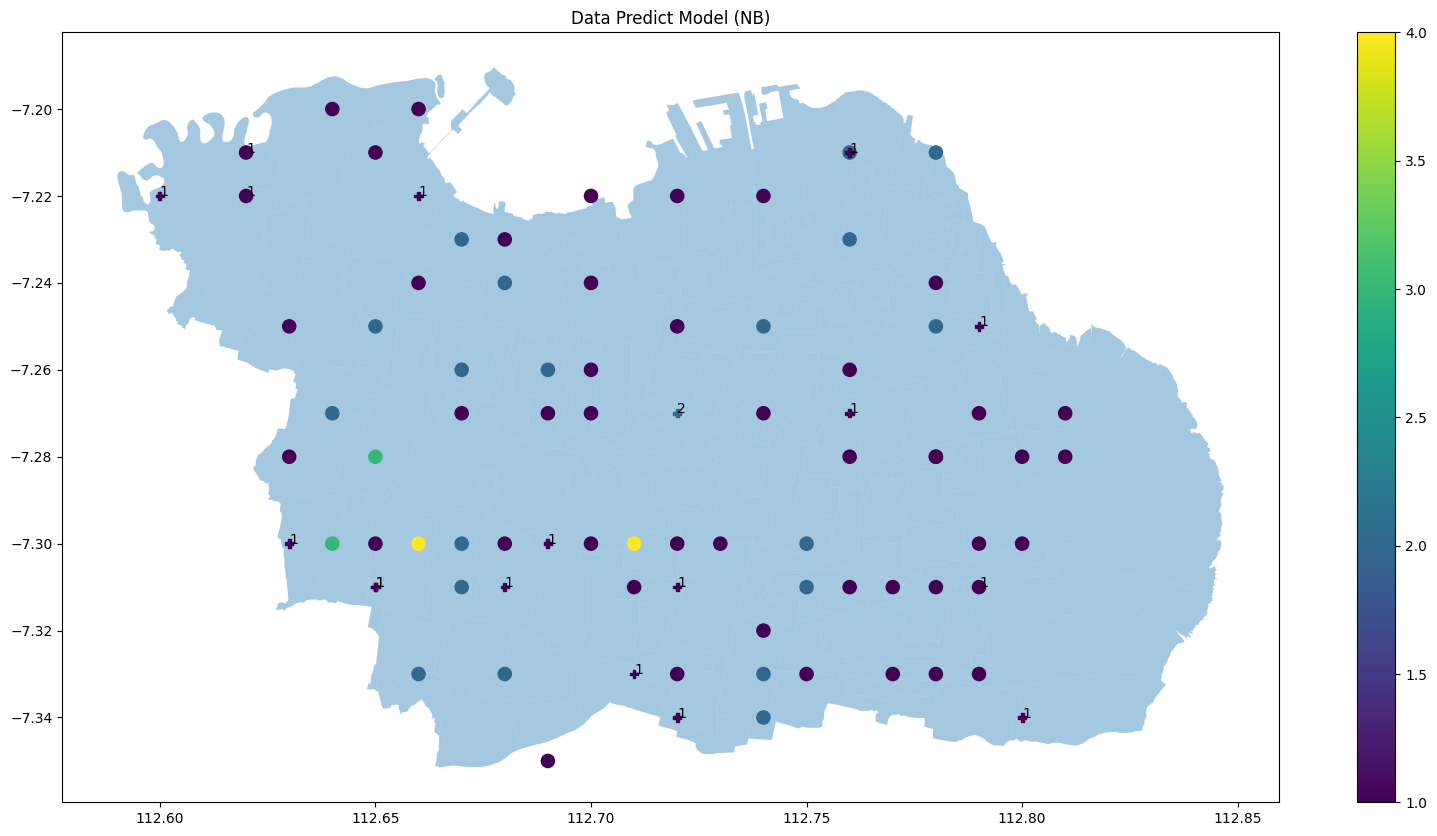

In [39]:
sby.plot(alpha=0.4, figsize = (20,10), legend=True)
plt.title('Data Predict Model (NB)')

plt.scatter(X_train[:,1], X_train[:, 0], c=y_train, s=90)

plt.colorbar()
plt.scatter(X_test[:,1], X_test[:, 0], c=Gnb_pred, marker="P")
for i, txt in enumerate(Gnb_pred):
    plt.annotate(txt, (X_test[:,1][i], X_test[:,0][i]))
plt.clim(1,4)
plt.show()

**Plotting Data Model KNN**

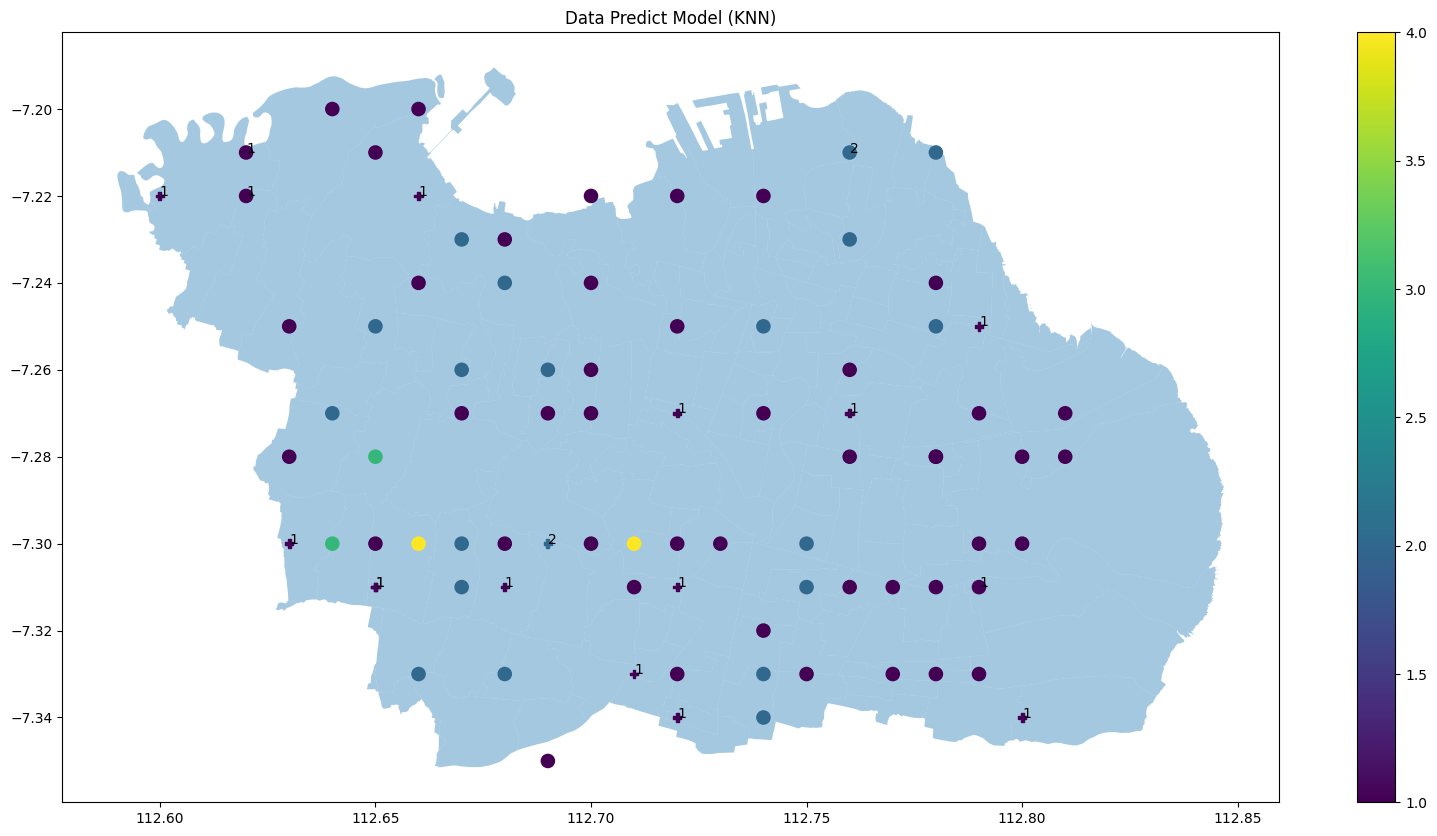

In [38]:
sby.plot(alpha=0.4, figsize = (20,10), legend=True)
plt.title('Data Predict Model (KNN)')

plt.scatter(X_train[:,1], X_train[:, 0], c=y_train, s=90)

plt.colorbar()
plt.scatter(X_test[:,1], X_test[:, 0], c=Knn_pred, marker="P")
for i, txt in enumerate(Knn_pred):
    plt.annotate(txt, (X_test[:,1][i], X_test[:,0][i]))
plt.clim(1,4)
plt.show()

**Plotting Data Hasil Komparasi**

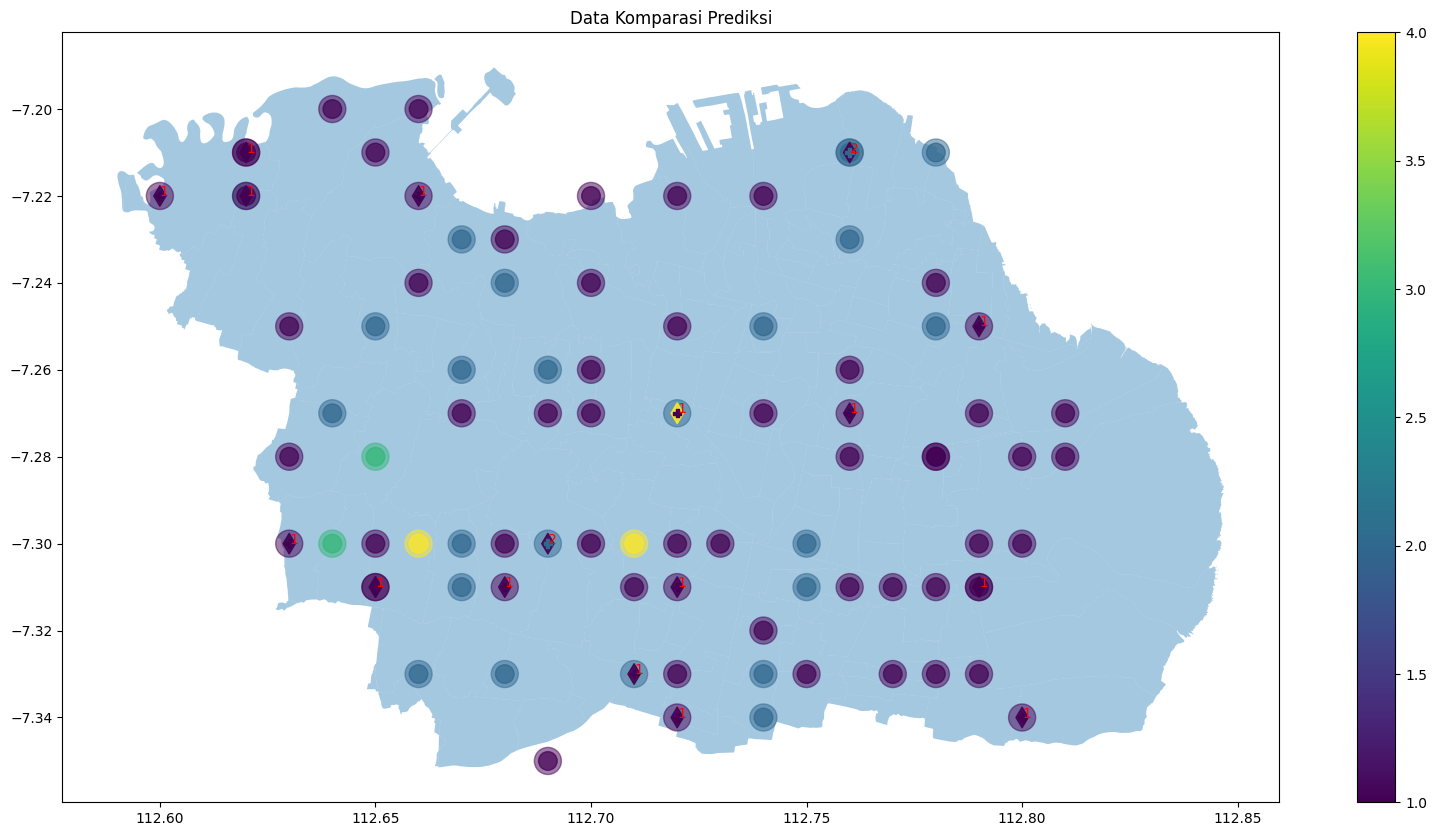

In [40]:
sby.plot(alpha=0.4, figsize = (20,10), legend=True)

plt.title('Data Komparasi Prediksi')

plt.scatter(X[:,1], X[:, 0], c=y, s=380, alpha=0.5)

plt.scatter(X_train[:,1], X_train[:, 0], c=y_train, s=180, alpha=0.7)

plt.scatter(X_test[:,1], X_test[:, 0], c=Gnb_pred, marker="d", s=110, alpha=0.9)

plt.scatter(X_test[:,1], X_test[:, 0], c=Knn_pred, marker="P")

for i, txt in enumerate(Knn_pred):
    plt.annotate(txt, (X_test[:,1][i], X_test[:,0][i]), color='red')
plt.clim(1,4)
plt.colorbar()
plt.show()